# Initial Value ODE

## Symbolic solutions
### Create the equation 
### $$y = -0.5x^4+4x^3-10x^2+8.5x+1$$

In [186]:
import sympy as sp

In [187]:
x = sp.Symbol('x')

In [188]:
y = -0.5*x**4+4*x**3-10*x**2+8.5*x+1

In [189]:
y

-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

### Take the Derivative

In [190]:
dydx = y.diff()
dydx

-2.0*x**3 + 12*x**2 - 20*x + 8.5

In [191]:
yf = sp.Function('y')(x)
dydxs = yf.diff(x)
expr = sp.Eq(dydxs, -2*x**3+12*x**2-20*x+8.5)
expr

Eq(Derivative(y(x), x), -2*x**3 + 12*x**2 - 20*x + 8.5)

### Solve the derivative symbolically

In [8]:
soln = sp.dsolve(expr,yf)
soln

Eq(y(x), C1 - x**4/2 + 4*x**3 - 10*x**2 + 17*x/2)

### Symbolic solution of real problem

Newton's Law of Cooling is a simple first order ODE. 

$$\frac{dT(t)}{dt}=-k(T(t)-T_a)$$

Lets assume for this case the initial value problem (IVP) of $T(0)=T_0$ and solve symbolically.

In [9]:
t, k, T0, Ta = sp.symbols('t,k,T_0,T_a')
T = sp.Function('T')

In [10]:
ode = T(t).diff(t)+k*(T(t)-Ta)
sp.Eq(ode)

Eq(k*(-T_a + T(t)) + Derivative(T(t), t), 0)

In [11]:
ode_sol = sp.dsolve(ode)
ode_sol

Eq(T(t), C1*exp(-k*t) + T_a)

In [12]:
ics = {T(0): T0}
ics

{T(0): T_0}

In [13]:
C_eq = sp.Eq(ode_sol.lhs.subs(t,0).subs(ics),ode_sol.rhs.subs(t,0))
C_eq

Eq(T_0, C1 + T_a)

In [14]:
C_sol = sp.solve(C_eq)
C_sol

[{C1: T_0 - T_a}]

In [15]:
ode_sol.subs(C_sol[0])

Eq(T(t), T_a + (T_0 - T_a)*exp(-k*t))

In [16]:
def apply_ics(sol,ics,x,known_params):
    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x,n) - sol.rhs.diff(x,n)).subs(x,0).subs(ics) for n in range(len(ics))]
    sol_params = sp.solve(eqs, free_params)
    return sol.subs(sol_params)

In [17]:
ode_sol

Eq(T(t), C1*exp(-k*t) + T_a)

In [18]:
apply_ics(ode_sol, ics, t, [k, Ta])

Eq(T(t), T_a + (T_0 - T_a)*exp(-k*t))

## Complex Second Order ODE

In [169]:
t, omega0, gamma= sp.symbols("t, omega_0, gamma", positive=True)
x = sp.Function("x")
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t) 
sp.Eq(ode)


Eq(2*gamma*omega_0*Derivative(x(t), t) + omega_0**2*x(t) + Derivative(x(t), (t, 2)), 0)

In [170]:
ode_sol = sp.dsolve(ode)
ode_sol

Eq(x(t), C1*exp(omega_0*t*(-gamma - sqrt(gamma - 1)*sqrt(gamma + 1))) + C2*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1))))

In [171]:
ics = {x(0): 1, x(t).diff(t).subs(t,0):0}
ics

{x(0): 1, Subs(Derivative(x(t), t), t, 0): 0}

In [172]:
x_t_sol = apply_ics(ode_sol,ics,t,[omega0,gamma])
x_t_sol

Eq(x(t), (-gamma/(2*sqrt(gamma**2 - 1)) + 1/2)*exp(omega_0*t*(-gamma - sqrt(gamma - 1)*sqrt(gamma + 1))) + (gamma/(2*sqrt(gamma**2 - 1)) + 1/2)*exp(omega_0*t*(-gamma + sqrt(gamma - 1)*sqrt(gamma + 1))))

In [173]:
x_t_critical = sp.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

(omega_0*t + 1)*exp(-omega_0*t)

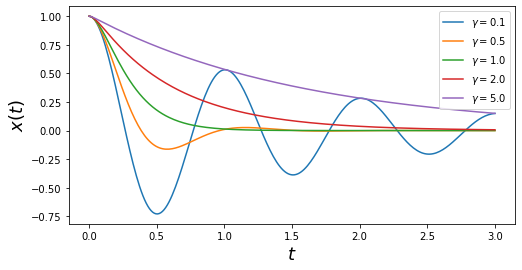

In [174]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(8, 4)) 
tt = np.linspace(0, 3, 250)
w0 = 2 * sp.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]: 
    if g == 1:
        x_t = sp.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy') 
    else:
        x_t = sp.lambdify(t, x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy') 
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
ax.set_xlabel(r"$t$", fontsize=18) 
ax.set_ylabel(r"$x(t)$", fontsize=18) 
ax.legend()

## Complex second order ODE that only has series expansion solution

In [175]:
x = sp.symbols('x')
y = sp.Function('y')
f = y(x)**2+x
sp.Eq(y(x).diff(x), f)

Eq(Derivative(y(x), x), x + y(x)**2)

In [176]:
sp.dsolve(y(x).diff(x) - f)

Eq(y(x), x**2*(2*C1**3 + 1)/2 + x**5*(10*C1**3*(6*C1**3 + 1) + 20*C1**3 + 3)/60 + C1 + C1*x**3*(3*C1**3 + 1)/3 + C1**2*x + C1**2*x**4*(12*C1**3 + 5)/12 + O(x**6))

## Equation that doesn't have analytical solution

In [181]:
sp.Eq(y(x).diff(x,x), f)

Eq(Derivative(y(x), (x, 2)), x + y(x)**2)

In [182]:
sp.dsolve(y(x).diff(x,x) - f)

NotImplementedError: solve: Cannot solve -x - y(x)**2 + Derivative(y(x), (x, 2))

## Numerical Methods

In [183]:
import numpy as np

### Create python functions for the symbolic functions

In [192]:
x = sp.Symbol('x')

In [193]:
y = -0.5*x**4+4*x**3-10*x**2+8.5*x+1

In [194]:
y

-0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1

### Take the Derivative

In [195]:
dydx = y.diff()
dydx

-2.0*x**3 + 12*x**2 - 20*x + 8.5

## Lambdify the symbolic function

In [199]:
xx = np.linspace(0,4)
yy = sp.lambdify(x,y)
dyydxx = sp.lambdify(x,dydx)

In [200]:
import matplotlib.pyplot as plt

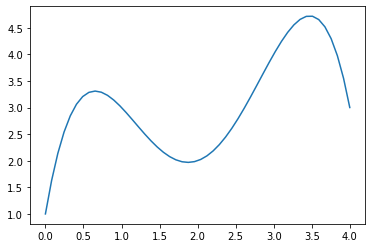

In [201]:
plt.plot(xx,yy(xx))

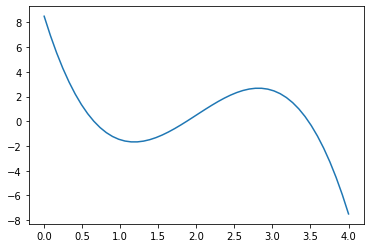

In [202]:
plt.plot(xx,dyydxx(xx))

### Create a solution routine to perform the Euler method

### $$ y_{i+1}=y_i+f(x_i,y_i)h$$

In [203]:
ys = np.zeros(len(xx))
n = 0
h = xx[1]-xx[0]
for xs in xx:
    if n == 0:
        ys[n] = 1.
    else:
        ys[n] = (ys[n-1]+dyydxx(xs)*h)
    n+=1

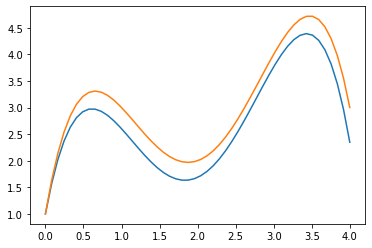

In [204]:
plt.plot(xx,ys,xx,yy(xx))

In [205]:
print('The Average Error is', np.round(np.average(ys-yy(xx))*100,2),'%')

The Average Error is -31.78 %


In [206]:

xx = np.linspace(0,4,num=1000)
ys = np.zeros(len(xx))
ys2 = np.zeros(len(xx))
n = 0
h = xx[1]-xx[0]
for xs in xx:
    if n == 0:
        ys[n] = 1.
        ys2[n] = 1.
    else:
        ys[n] = (ys[n-1]+dyydxx(xs)*h)
        ys2[n] = ys[n-1]+((dyydxx(xs)+ys[n])*h/2)
    n+=1

    

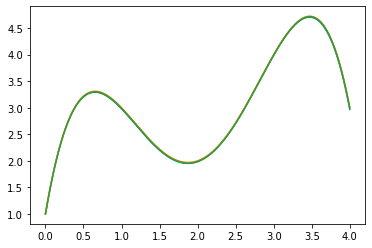

In [207]:
plt.plot(xx,ys,xx,yy(xx),xx,ys2)

In [208]:
print('For h = ',np.round(h,5), ' The Average Error is', np.round(np.average(ys-yy(xx))*100,2),'%')

For h =  0.004  The Average Error is -1.6 %


In [209]:
print('For h = ',np.round(h,5), ' The Average Error is', np.round(np.average(ys2-yy(xx))*100,2),'%')

For h =  0.004  The Average Error is -1.09 %


In [210]:
from scipy.integrate import solve_ivp
def dif(x,y): return -2*x**3+12*x**2-20*x+8.5
sol = solve_ivp(dif, [0, 4], [1],method='RK45',t_eval=xx)
yyy = sol.y.T

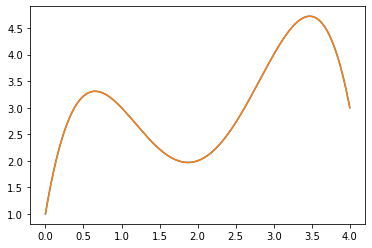

In [211]:
plt.plot(sol.t,yyy,xx,yy(xx))

In [212]:
print(' The Average Error is', np.average(yyy-yy(xx))*100,'%')

 The Average Error is -1.8434889170748648e-13 %


# Solve using Scipy odeint

In [213]:
from scipy.integrate import odeint

## $$\tau \frac{dy}{dt}=-y+Ku$$

In [214]:
def firstorder(y,t,K,u):
    tau = 5.0
    dydt = (-y+K*u)/tau
    return dydt

In [215]:
time = np.linspace(0,10,11)
K = 2.0
u = np.zeros(len(time))
u[3:] = 1
y0 = 0

In [217]:
ys = np.zeros(len(time))
ys[0] = y0
for i in range(len(time)-1):
    ts = [time[i],time[i+1]]
    y = odeint(firstorder,0,ts,args=(K,u[i]))
    y0 = y[1]
    ys[i+1] = y0
    print(y[1])

[0.]
[0.]
[0.]
[0.36253849]
[0.36253849]
[0.36253849]
[0.36253849]
[0.36253849]
[0.36253849]
[0.36253849]


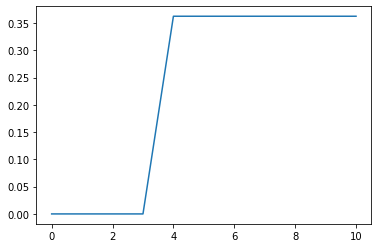

In [218]:
plt.plot(time,ys)

In [219]:
def model(y,t,k):
    dydt = -k*y
    return dydt

In [220]:
y0 = 5
t = np.linspace(0,20)

In [221]:
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

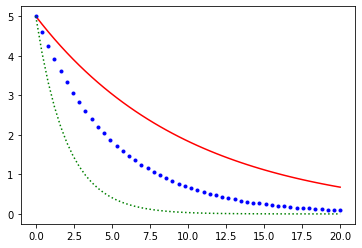

In [222]:
plt.plot(t,y1,'r-')
plt.plot(t,y2,'b.')
plt.plot(t,y3,'g:')

In [223]:
def model(y,t):
    dydt = -y + 1
    return dydt

In [224]:
y0 = 0
y1 = odeint(model,y0,t)

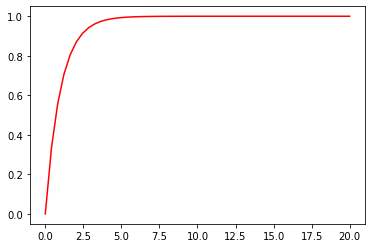

In [225]:
plt.plot(t,y1,'r-')

In [226]:
def model(y,t):
    if (t<10.):
        u = 0
    else:
        u = 2.
    dydt = (-y+u)/5.
    return dydt

In [227]:
y0 = 1
y1 = odeint(model,y0,t)

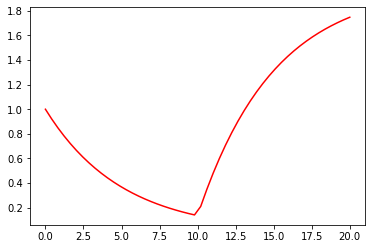

In [228]:
plt.plot(t,y1,'r-')

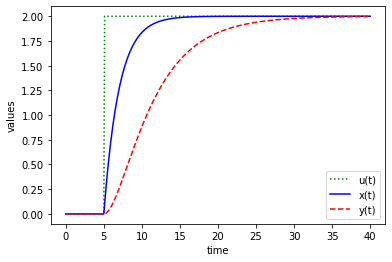

In [229]:
# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

In [230]:
def model(y,x):
    dydx = x-y**2
    return dydx

In [231]:
x = [1,1.1,1.2,1.3,1.4,1.5]
y1 = 0
yy = odeint(model,y1,x)

In [232]:
yy

array([[0.        ],
       [0.10464265],
       [0.21696868],
       [0.33427345],
       [0.45363837],
       [0.57219426]])

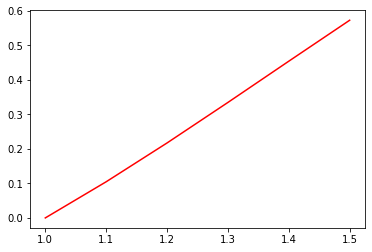

In [233]:
plt.plot(x,yy,'r-')

In [234]:
x = sp.symbols('x')
y = sp.Function('y')

In [235]:
f = y(x)**2 + x
f

x + y(x)**2

In [236]:
f_np = sp.lambdify((y(x), x), f)

In [237]:
y0 = 0
xp = np.linspace(0,1.9,100)
yp = odeint(f_np, y0, xp)
xm = np.linspace(0,-5,100)
ym = odeint(f_np, y0, xm)

In [238]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sp.lambdify((x, y_x), f_xy, 'numpy') 
    x_vec = np.linspace(x_lim[0], x_lim[1], 20) 
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))
    
    dx = x_vec[1] - x_vec[0] 
    dy = y_vec[1] - y_vec[0]
    
    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2) 
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2) 
            ax.plot([xx - Dx/2, xx + Dx/2],[yy - Dy/2, yy + Dy/2], 'b', lw=0.5) 
    ax.axis('tight')
    ax.set_title(r"$%s$" % (sp.latex(sp.Eq(y(x).diff(x), f_xy))),
    fontsize=18)
    return ax

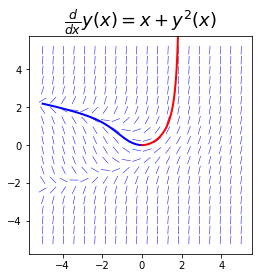

In [239]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm,ym, 'b', lw=2)
ax.plot(xp,yp, 'r', lw=2)


$$m_1x_1''(t)+\gamma_1x_1'(t)+k_1x_1-k_2(x_2-x_1)=0$$
$$m_2x_2''(t)+\gamma_2x_2'(t)+k_2(x_2-x_1)=0$$

$$y_0(t)=x_1(t),y_1(t)=x_1'(t),y_2(t)=x_2(t),y_3(t)=x_2'(t)$$

$$\frac{d}{dt}\begin{bmatrix} y_0(t) \\ y_1(t) \\ y_2(t) \\ y_3(t) \end{bmatrix}=f(t,\mathbf{y}(t))=\begin{bmatrix} y_1(t) \\ (-\gamma_1y_1(t)-k_1y_0(t)-k_2y_0(t)+k_2y_2(t))/m_1 \\ y_3(t) \\ (-\gamma_2y_3(t)-k_2y_2(t)+k_2y_0(t))/m_2 \end{bmatrix}$$

In [240]:
def f(t,y,args):
    m1, k1, g1, m2, k2, g2 = args
    return [y[1], - k1/m1 * y[0] + k2/m1 * (y[2] - y[0]) - g1/m1 * y[1],y[3], - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3]]

In [241]:
m1, k1, g1 = 1.0, 10.0, 0.5
m2, k2, g2 = 2.0, 40.0, 0.25
args = (m1, k1, g1, m2, k2, g2) 
y0 = [1.0, 0, 0.5, 0]
t = np.linspace(0, 20, 1000)

In [242]:
import scipy
r = scipy.integrate.ode(f)

In [243]:
r.set_integrator('lsoda');
r.set_initial_value(y0, t[0]);
r.set_f_params(args);

In [244]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y 
    r.integrate(r.t + dt) 
    idx += 1

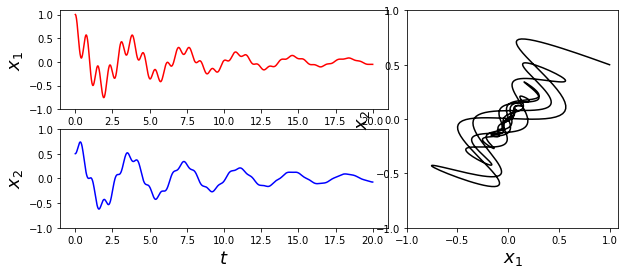

In [245]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2) 
# x_1 vs time plot
ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])
# x2 vs time plot
ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])
# x1 and x2 phase space plot
ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])

In [246]:
def jac(t, y, args):
    m1, k1, g1, m2, k2, g2 = args 
    return [[0, 1, 0, 0],
    [- k1/m2 - k2/m1, - g1/m1 * y[1], k2/m1, 0], [0, 0, 1, 0],[k2/m2, 0, - k2/m2, - g2/m2]]
r = scipy.integrate.ode(f, jac) 
r.set_jac_params(args);

In [247]:
t, g, m1, l1, m2, l2 = sp.symbols("t, g, m_1, l_1, m_2, l_2") 
theta1, theta2 = sp.symbols("theta_1, theta_2", cls=sp.Function) 
ode1 = sp.Eq((m1+m2)*l1 * theta1(t).diff(t,t) + m2*l2 * theta2(t).diff(t,t) + m2*l2 * theta2(t).diff(t)**2 * sp.sin(theta1(t)-theta2(t)) + g*(m1+m2) * sp.sin(theta1(t)))
ode1

Eq(g*(m_1 + m_2)*sin(theta_1(t)) + l_1*(m_1 + m_2)*Derivative(theta_1(t), (t, 2)) + l_2*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2 + l_2*m_2*Derivative(theta_2(t), (t, 2)), 0)

In [248]:
ode2 = sp.Eq(m2*l2 * theta2(t).diff(t,t) +
m2*l1 * theta1(t).diff(t,t) * sp.cos(theta1(t)-theta2(t)) -
m2*l1 * theta1(t).diff(t)**2 * sp.sin(theta1(t) - theta2(t)) + m2*g * sp.sin(theta2(t)))
ode2

Eq(g*m_2*sin(theta_2(t)) - l_1*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)**2 + l_1*m_2*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), (t, 2)) + l_2*m_2*Derivative(theta_2(t), (t, 2)), 0)

In [249]:
y1, y2, y3, y4 = sp.symbols("y_1, y_2, y_3, y_4", cls=sp.Function) 
varchange = {theta1(t).diff(t, t): y2(t).diff(t),theta1(t): y1(t),theta2(t).diff(t, t): y4(t).diff(t), theta2(t): y3(t)}
ode1_vc = ode1.subs(varchange) 
ode2_vc = ode2.subs(varchange)

In [250]:
ode3 = y1(t).diff(t) - y2(t) 
ode4 = y3(t).diff(t) - y4(t)

In [251]:
y = sp.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sp.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)
f = y.diff(t).subs(vcsol[0])

In [252]:
params = {m1: 5.0, l1: 2.0, m2: 1.0, l2: 1.0, g: 10.0}
f_np = sp.lambdify((t, y), f.subs(params), 'numpy')
jac = sp.Matrix([[fj.diff(yi) for yi in y] for fj in f]) 
jac_np = sp.lambdify((t, y), jac.subs(params), 'numpy')

In [253]:
from scipy import integrate
y0 = [2.0, 0, 0, 0]
t = np.linspace(0, 20, 1000)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, t[0]) 
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y 
    r.integrate(r.t + dt) 
    idx += 1

In [254]:
theta1_np, theta2_np = y[:, 0], y[:, 2] 
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np) 
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)

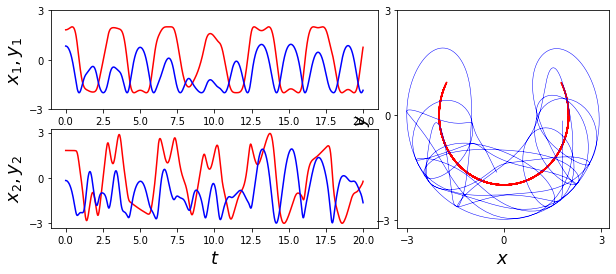

In [255]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
ax1.plot(t, x1, 'r')
ax1.plot(t, y1, 'b') 
ax1.set_ylabel('$x_1, y_1$', fontsize=18) 
ax1.set_yticks([-3, 0, 3])
ax2.plot(t, x2, 'r')
ax2.plot(t, y2, 'b') 
ax2.set_xlabel('$t$', fontsize=18) 
ax2.set_ylabel('$x_2, y_2$', fontsize=18) 
ax2.set_yticks([-3, 0, 3])
ax3.plot(x1, y1, 'r')
ax3.plot(x2, y2, 'b', lw=0.5) 
ax3.set_xlabel('$x$', fontsize=18) 
ax3.set_ylabel('$y$', fontsize=18) 
ax3.set_xticks([-3, 0, 3]) 
ax3.set_yticks([-3, 0, 3])

[1.         0.740625   0.58324219 0.50486902 0.49224729 0.54916339
 0.70704786 1.05394322 1.81805205]
[1.         0.76353855 0.60149724 0.50440538 0.46455902 0.48482934
 0.59155536 0.87062697 1.59466976]


Text(0, 0.5, 'y')

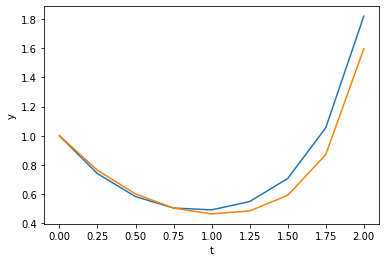

In [256]:
import numpy as np
from matplotlib import pyplot as plt

def dydt(t,y):
    dydt = y*t**2.-1.1*y
    return dydt
    
def yt(t):
    yt = np.exp(1/3.*t**3-1.1*t)
    return yt

t0 = 0.
tf = 2.
y0 = 1.0
h = 0.25
n = int((tf-t0)/h+1)
t = np.linspace(t0,tf,n)
y = np.zeros([n])
yan = np.zeros([n])
y[0] = y0
yan[0] = y0

for i in range(1,n):
    y[i] = y[i-1]+h*(dydt(t[i],y[i-1]))
    yan[i] = yt(t[i])
print(y)
print(yan)
plt.plot(t,y)
plt.plot(t,yan)
plt.xlabel('t')
plt.ylabel('y')

## Tank mass balance problem
$$A_c\frac{dh_1}{dt}=q_{in}-q_{out1}$$

$$A_c\frac{dh_2}{dt}=q_{out1}-q_{out2}$$

$$q_{out1}=c_1\sqrt{h_1}$$

$$q_{out2}=c_2\sqrt{h_2}$$

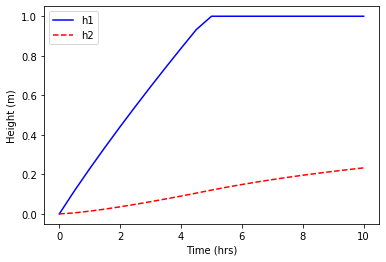

In [257]:
def tank(h,t,c1,c2):
    Ac = 2.0
    qin = 0.5
    qout1 = c1 * h[0]**0.5
    qout2 = c2 * h[1]**0.5
    dhdt1 = (qin-qout1)/Ac
    dhdt2 = (qout1-qout2)/Ac
    if h[0]>=1 and dhdt1>0:
        dhdt1 = 0
    if h[1]>=1 and dhdt2>0:
        dhdt2 = 0
    dhdt = (dhdt1,dhdt2)
    return dhdt

h0 = [0,0]
t = np.linspace(0,10,21)
c = (0.13,0.20)
y = odeint(tank,h0,t,c)
plt.plot(t,y[:,0],'b-')
plt.plot(t,y[:,1],'r--')
plt.xlabel('Time (hrs)')
plt.ylabel('Height (m)')
plt.legend(['h1','h2'])

# Homework Problem

## Solve $$\frac{dy}{dt}=-cy$$

Plot for values of c = 1,2,3. $$y(0)=1.0$$

In [346]:
def y_prime(y,t,c):  return -c*y

In [347]:
t = np.linspace(0,10,100)
args = (1,)
y = odeint(y_prime,1,t,args=args)
args = (2,)
y1 = odeint(y_prime,1,t,args=args)
args = (3,)
y2 = odeint(y_prime,1,t,args=args)

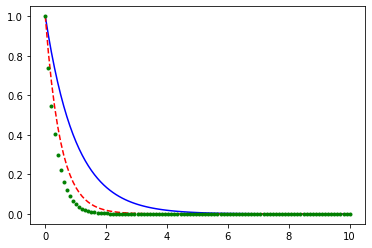

In [348]:
plt.plot(t,y,'b-')
plt.plot(t,y1,'r--')
plt.plot(t,y2,'g.')